## Project 8: Python Basics
## Name: Ziming Huang                                

### Exercise 1
#### 1A

In [1]:
#1A
prices=[142.19,142.27,142.29,142.62,142.70,142.64,142.61,142.62,142.63,
        142.67,142.62,142.50,142.45,142.57,142.54,142.32,142.17,142.03,
        141.85,141.30,141.36,141.01,140.78,140.96,141.16,141.38]
frequency=78*5/len(prices)#unit=minute
print('The freuency of above price data is '+ str(frequency)+' minute.')

The freuency of above price data is 15.0 minute.


#### 1B

In [2]:
#1B
import math
lr=[]
for i in range(1,len(prices)):
    lr.append(math.log(prices[i])-math.log(prices[i-1]))

#### 1C

In [3]:
#1C
import statistics as sta
m_lr=sta.mean(lr)
sd_lr=sta.stdev(lr)
print('log-return mean: '+str(m_lr))
print('log-return stdev: '+str(sd_lr))

log-return mean: -0.00022851562661898583
log-return stdev: 0.0013378543298329293


#### 1D

In [4]:
#1D
rv=0
for i in lr:
    rv += i**2
rv=100*math.sqrt(rv*252)
print('annual_RV: '+str(rv)+' %')


annual_RV: 10.561259591653997 %


#### 1E

In [5]:
print(0.1+0.2==0.3)
print(sum([0.1,0.2])==0.3)

False
False


(1)
Not all floating point numbers are exactly representable on a finite machine. Neither 0.1 nor 0.2 are exactly representable in binary floating point. And nor is 0.3.

A number is exactly representable if it is of the form a/b where a and b are an integers and b is a power of 2. 

(2)
Most of programming languages ahve the same issue.

(3)
This issue would not affect the computation of realized variance much since the computation error is very small.


#### 1F

In [6]:
import math
sum_rv=100*math.sqrt(sum(i**2 for i in lr)*252)
fsum_rv=100*math.sqrt(math.fsum(i**2 for i in lr)*252)
print('annual_RV: '+str(sum_rv)+' %')
print('annual_RV: '+str(fsum_rv)+' %')
print(sum_rv==fsum_rv)


annual_RV: 10.561259591653997 %
annual_RV: 10.561259591653997 %
True


In this case, the realized variance calculated by sum() and math.fsum() is the same. 

However, math.fsum may be more precise in other cases since it tracks multiple intermediate partial sums to avoid any kind of precision loss. It has a much higher level of precision than sum().

#### 1G

In [7]:
#1E 
import math
bv=0
for i in range(1,len(lr)):
    bv += abs(lr[i-1]*lr[i])*math.pi/2
bv=100*math.sqrt(bv*252)
print('annual_BV: '+str(bv)+' %')

annual_BV: 9.997816709510156 %


### Exercise 2
#### 2A

In [8]:
#2A

#create a function to split dates, times and prices from original data
def data_reshape(data_position):
    f=open(data_position,"r")
    contents=f.read()
    f.close
    lines=contents.split('\n')
    dates, times, prices=[],[],[]
    for line in lines[:-1]:# delete the last line, since it is ''
        date,time,price =line.split(',')#here use line,split, instead of lines.split
        dates.append(int(date))
        times.append(int(time))
        prices.append(float(price))
    return dates, times,prices

#get dates, times and prices from data_reshape function
dates_PG, times_PG,prices_PG=data_reshape("D:/ZM-Documents/MATLAB/data/PG.csv")
dates_DIS, times_DIS,prices_DIS=data_reshape("D:/ZM-Documents/MATLAB/data/DIS.csv")

#### 2B

In [9]:
#2B
#create a function to identify the size of data
def data_size(dates):
    from collections import Counter
    mylist=Counter(dates)
    N=mylist[dates[0]]
    T=len(mylist)
    return T,N

#get the number of obervation day and obsrvation inveval
T_PG,N_PG = data_size(dates_PG)
T_DIS,N_DIS = data_size(dates_DIS)
print('For the data used:\nT_PG = '+str(T_PG)+'   N_PG = '+ str(N_PG))
print('T_DIS = '+str(T_DIS)+'  N_DIS = '+ str(N_DIS))

For the data used:
T_PG = 2769   N_PG = 78
T_DIS = 2769  N_DIS = 78


#### 2C

In [10]:
#2C
#Transform the list of all prices into a list of lists, where each sublist contains all prices

def tf_price(prices,T,N):
    prices2=[]
    for t in range(0,T):
        prices1=[]
        for n in range(t*N,(t+1)*N):
            prices1.append(prices[n])
        prices2.append(prices1)
    return prices2

p_PG=tf_price(prices_PG,T_PG,N_PG)
p_DIS=tf_price(prices_DIS,T_DIS,N_DIS)

#### 2D

In [11]:
#2D
#Obtain a list of lists for returns, where each sublist contains the returns for a day
def log_return(prices,T,N):
    import math
    lr2=[]
    for t in range(0,T):
        lr1=[]
        for i in range(1,N):
            lr1.append(math.log(prices[t][i])-math.log(prices[t][i-1]))
        lr2.append(lr1)  
    return lr2

lr_PG=log_return(p_PG,T_PG,N_PG)
lr_DIS=log_return(p_DIS,T_DIS,N_DIS)

#### 2E

In [12]:
#2E
#Compute the realized variance for each day in the sample
def rv(lr,T,N):
    rv2=[]
    for t in range(0,T):
        rv1=0
        for i in lr[t]:
            rv1 += i**2
        rv2.append(rv1)
    return rv2
rv_PG=rv(lr_PG,T_PG,N_PG)
rv_DIS=rv(lr_DIS,T_PG,N_DIS)

#### 2F

In [13]:
#2F
mean_rv_PG=100*math.sqrt(sta.mean(rv_PG)*252)
median_rv_PG=100*math.sqrt(sta.median(rv_PG)*252)
mean_rv_DIS=100*math.sqrt(sta.mean(rv_DIS)*252)
median_rv_DIS=100*math.sqrt(sta.median(rv_DIS)*252)
print('For the data used:\n \nmean(annul_rv_PG) = '+str(mean_rv_PG)+' %'+'\nmedian(annul_rv_PG) = '+str(median_rv_PG)+' %')
print('\nmean(annul_rv_DIS) = '+str(mean_rv_DIS)+' %'+'\nmedian(annul_rv_DIS) = '+str(median_rv_DIS)+' %')

For the data used:
 
mean(annul_rv_PG) = 15.624203800306113 %
median(annul_rv_PG) = 11.364598799912011 %

mean(annul_rv_DIS) = 21.778821985923436 %
median(annul_rv_DIS) = 15.019035530425818 %


### Exercise 3
#### 3A

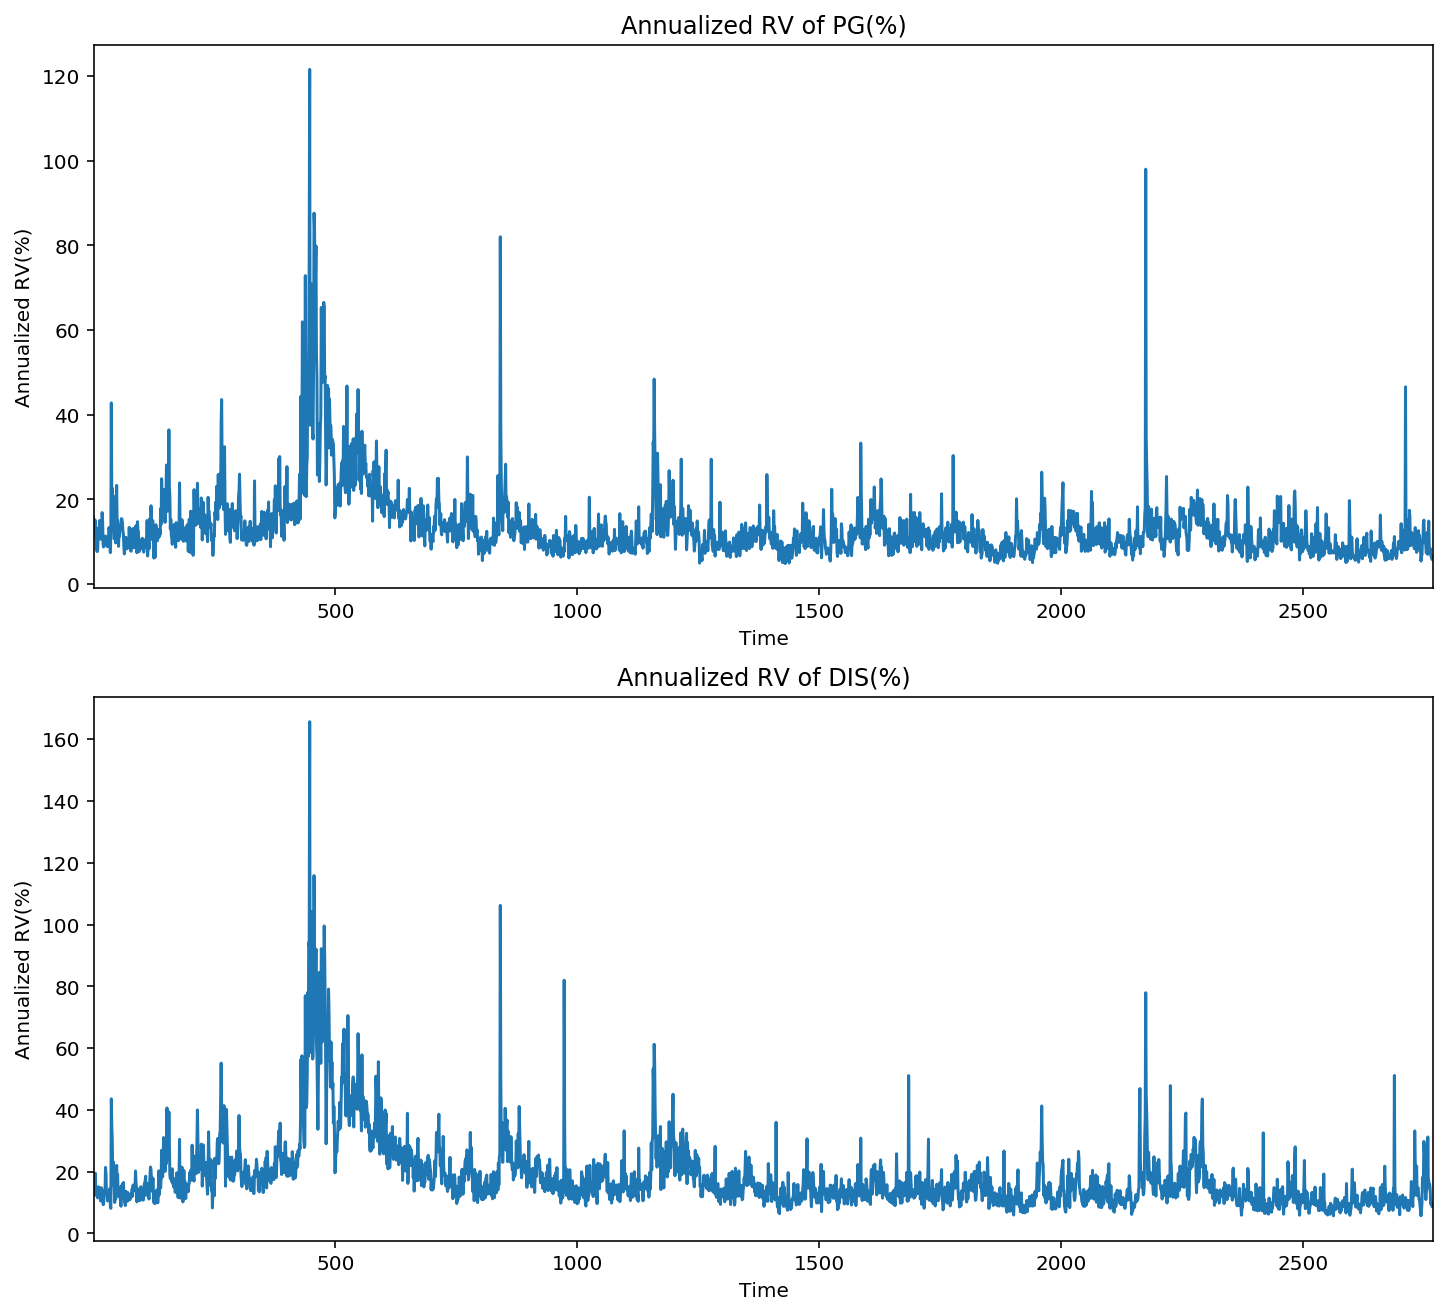

In [14]:
#3A
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.figure(figsize=(12,11))

plt.subplot(2,1,1)
plt.plot(range(0,len(rv_PG)),[100*math.sqrt(252*rv) for rv in rv_PG])
plt.title('Annualized RV of PG(%)')
plt.xlabel('Time')
plt.ylabel('Annualized RV(%)')
plt.xlim(1,len(rv_PG))

plt.subplot(2,1,2)
plt.plot(range(0,len(rv_DIS)),[100*math.sqrt(252*rv) for rv in rv_DIS])
plt.title('Annualized RV of DIS(%)')
plt.xlabel('Time')
plt.ylabel('Annualized RV(%)')
plt.xlim(1,len(rv_DIS))
print('')

#### 3B

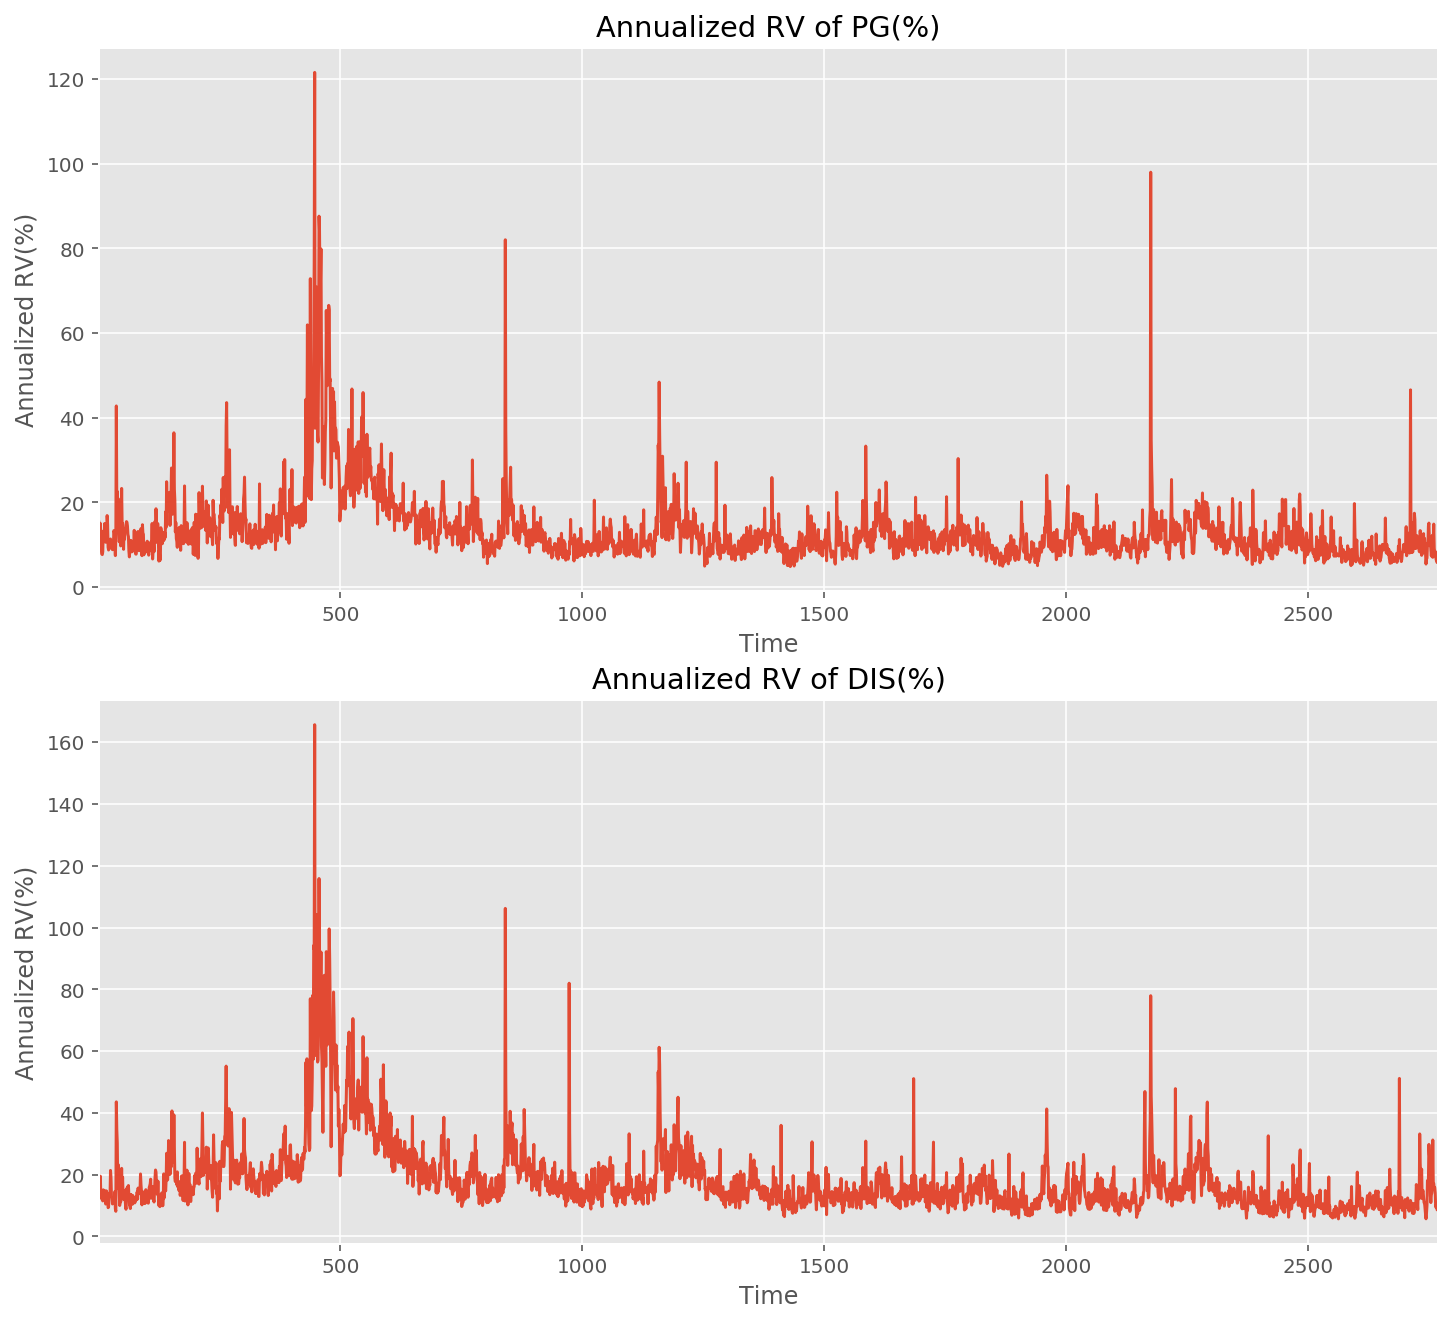

In [15]:
#3B
with plt.style.context("ggplot"):

    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    plt.figure(figsize=(12,11))

    plt.subplot(2,1,1)
    plt.plot(range(0,len(rv_PG)),[100*math.sqrt(252*rv) for rv in rv_PG])
    plt.title('Annualized RV of PG(%)')
    plt.xlabel('Time')
    plt.ylabel('Annualized RV(%)')
    plt.xlim(1,len(rv_PG))


    plt.subplot(2,1,2)
    plt.plot(range(0,len(rv_DIS)),[100*math.sqrt(252*rv) for rv in rv_DIS])
    plt.title('Annualized RV of DIS(%)')
    plt.xlabel('Time')
    plt.ylabel('Annualized RV(%)')
    plt.xlim(1,len(rv_DIS))
    print('')

#### 3C

In [16]:
#3C
from datetime import datetime
print(datetime(2017,11,20,9,27,44))
print(datetime.strptime('20171120 0927','%Y%m%d %H%M'))

2017-11-20 09:27:44
2017-11-20 09:27:00


(1) For the directive in function datetime.strptime:

\%Y: "Year with century as a decimal number", such as 0001, 2014...

\%m: "Month as a zero-padded decimal number", such as 01, 02...

\%d: "Day of the month as a zero-padded decimal number", such as 01,31...

\%H: "Hour (24-hour clock) as a zero-padded decimal number", such as 00, 01...

\%M: "Minute as a zero-padded decimal number", such as 01,59...

\%S: "Second as a zero-padded decimal number", such as 01,59...

(2) The reason to type "0927" instead of "927" is to keep the data input format consistent with the data format requirement.

#### 3D

In [17]:
#3D
#Obtain date strings from minute frequency data
def mdate_str(dates,times):
    dstr=[]
    for date,time in zip(dates,times):
        dstr.append(str(date)+' '+str(time).zfill(4))
    return dstr

datestr_PG=mdate_str(dates_PG,times_PG)
datestr_DIS=mdate_str(dates_DIS,times_DIS)


#### 3E

In [18]:
#3E
#Obtain datetimes strings from minute frequency data
def mdate_time(dates,times):
    datestimes=[]
    for date,time in zip(dates,times):
        datestimes.append(datetime.strptime(str(date)+' '+str(time).zfill(4),'%Y%m%d %H%M'))
    return datestimes 

date_time_PG=mdate_time(dates_PG,times_PG)
date_time_DIS=mdate_time(dates_DIS,times_DIS)


#### 3F/G

In [19]:
#3F
#Get x-axis label
days_PG=[]
for day in list(dict.fromkeys(dates_PG)):
    days_PG.append(datetime.strptime(str(day),'%Y%m%d'))
    
days_DIS=[]
for day in list(dict.fromkeys(dates_DIS)):
    days_DIS.append(datetime.strptime(str(day),'%Y%m%d'))
  

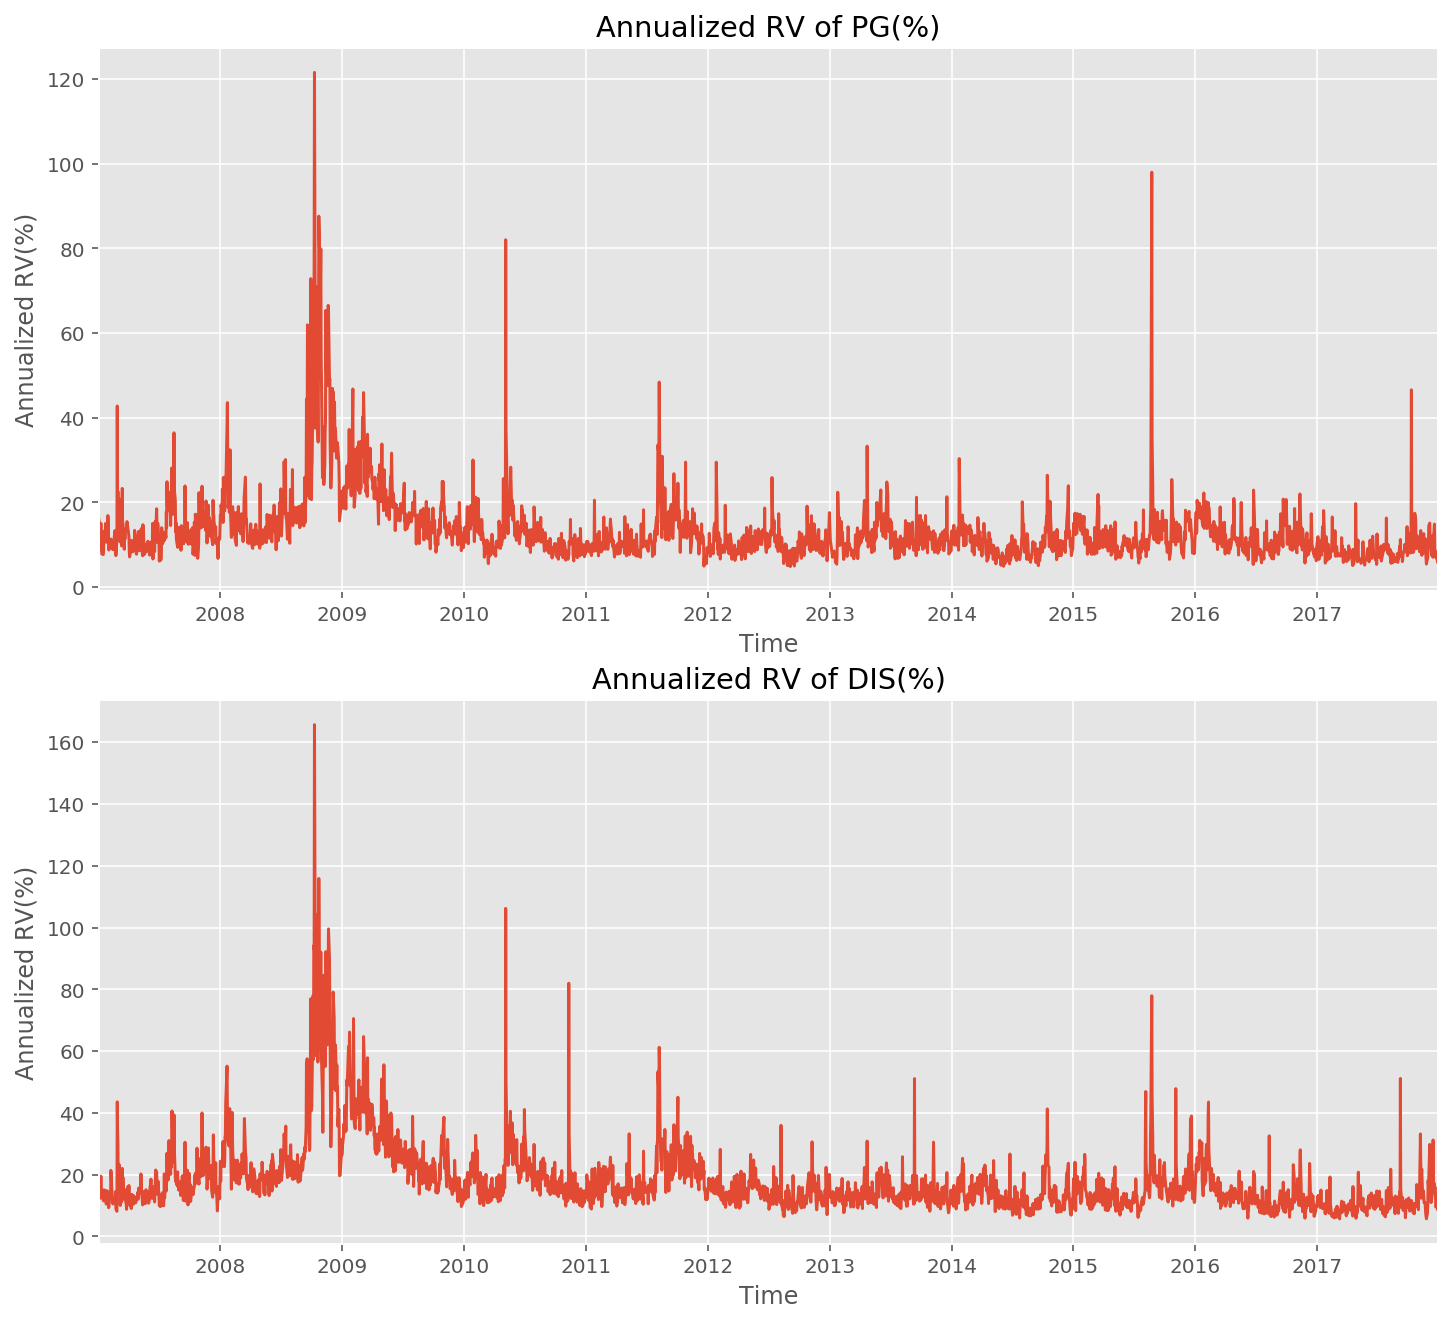

In [20]:
with plt.style.context("ggplot"):

    %matplotlib inline
    %config InlineBackend.figure_format='retina'
    plt.figure(figsize=(12,11))

    plt.subplot(2,1,1)
    plt.plot(days_PG,[100*math.sqrt(252*rv) for rv in rv_PG])
    plt.title('Annualized RV of PG(%)')
    plt.xlabel('Time')
    plt.ylabel('Annualized RV(%)')
    plt.xlim(days_PG[0],days_PG[-1])


    plt.subplot(2,1,2)
    plt.plot(days_PG,[100*math.sqrt(252*rv) for rv in rv_DIS])
    plt.title('Annualized RV of DIS(%)')
    plt.xlabel('Time')
    plt.ylabel('Annualized RV(%)')
    plt.xlim(days_DIS[0],days_DIS[-1])
    print('')